## Title:  ICR Identity Age Related Conditions Prediction Model

#### Cameron Presley
#### start date:  2023-06-17
#### contact info:  cameron@cameron-presley.com
#### Kaggel Competition - Final Submission Deadline - 2023-08-10

https://www.kaggle.com/competitions/icr-identify-age-related-conditions

### Background

#### Goal of the Competition

* The goal of this competition is to predict if a person has any of three medical conditions 

* Predict if the person has one or more of any of the three medical conditions (Class 1), or none of the three medical conditions (Class 0) 

* Training data is based on a long and intrusive process to collect information from patients. 

* The goal of a predictive model is to shorten this process and keep patient details private by collecting key characteristics relative to the conditions, then encoding these characteristics.

* This model will help researchers discover the relationship between measurements of certain characteristics and potential patient conditions.


#### Context

* They say age is just a number but a whole host of health issues come with aging. From heart disease and dementia to hearing loss and arthritis, aging is a risk factor for numerous diseases and complications. The growing field of bioinformatics includes research into interventions that can help slow and reverse biological aging and prevent major age-related ailments. Data science could have a role to play in developing new methods to solve problems with diverse data, even if the number of samples is small.

* Currently, models like XGBoost and random forest are used to predict medical conditions yet the models' performance is not good enough. Dealing with critical problems where lives are on the line, models need to make correct predictions reliably and consistently between different cases.

* Founded in 2015, competition host InVitro Cell Research, LLC (ICR) is a privately funded company focused on regenerative and preventive personalized medicine. Their offices and labs in the greater New York City area offer state-of-the-art research space. InVitro Cell Research's Scientists are what set them apart, helping guide and defining their mission of researching how to repair aging people fast.











### Datasets: Files and Field Descriptions & Problem Type

* The competition data comprises over fifty anonymized health characteristics linked to three age-related conditions used to predict whether a subject has or has not been diagnosed with one of these conditions -- a binary classification problem.

#### train.csv - The training set.

* Id Unique identifier for each observation.
* AB-GL Fifty-six anonymized health characteristics. All are numeric except for EJ, which is categorical.
* Class A binary target: 1 indicates the subject has been diagnosed with one of the three conditions, 0 indicates    they have not.

#### test.csv - The test set. The goal is to predict the probability that a subject in this set belongs to each of the two classes.

#### greeks.csv - Supplemental metadata, only available for the training set.

* Alpha Identifies the type of age-related condition, if present.
    
        -- A No age-related condition. Corresponds to class 0.
    
        -- B, D, G The three age-related conditions. Correspond to class 1
        
 * Beta, Gamma, Delta Three experimental characteristics.
 
 * Epsilon The date the data for this subject was collected. Note that all of the data in the test set was collected after the training set was collected.

### Approach

1. Binary Classification Problem
2. Import libraries to perform EDA and model building using Classifiers
3. Read in datasets provided :  Train, Test, Metadata, Sample Submission

### EDA 

1. Observe data distribution, missigness, scale, datatypes, and suitability for modeling
2. Visualize the predictor (independent) and response (dependent) variables
3. Observe correlation
3. Explore datatypes and indicate where conversions are needed to support modeling

### Evaluation

* Submissions are evaluated using a balanced logarithmic loss. The overall effect is such that each class is roughly equally important for the final score.

* Each observation is either of class 0 or of class 1. For each observation, you must submit a probability for each class. The formula is then:

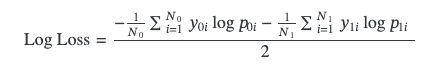

* where (N_{c}) is the number of observations of class (c), (\log) is the natural logarithm, (y_{c i}) is 1 if observation (i) belongs to class (c) and 0 otherwise, (p_{c i}) is the predicted probability that observation (i) belongs to class (c).

The submitted probabilities for a given row are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, each predicted probability 𝑝
 is replaced with max(min(𝑝,1−10−15),10−15)
.

In [1]:
#Import the neccesary libraries and avoid warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math

#library needed to read .xlsx files
#import xlrd

#data visualization libraries


import matplotlib.pyplot as plt
import seaborn as sns

#statistical analysis libraries

#import scipy.stats as stats
#import statsmodels.api as sm
#from statsmodels.stats.proportion import proportions_ztest
#from statsmodels.formula.api import ols # for ANOVA
#from statsmodels.stats.anova import anova_lm # for ANOVA
#from scipy.stats import chi2_contingency # for CHI SQUARE
#from scipy.stats import ttest_rel #paired T-test
#from scipy.stats import levene #Levene's test

#data cleansing tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
import missingno as mi

#model building libraries and tools

from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

# --> CLASSIFIER MODELS

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#use seaborn styling
sns.set_style("whitegrid")


### Load Data Sets



In [2]:
import os          

os.getcwd()
os.chdir('/kaggle/')
        
os.getcwd()  

'/kaggle'

In [3]:
os.listdir('/kaggle/input/icr-identify-age-related-conditions')

['sample_submission.csv', 'greeks.csv', 'train.csv', 'test.csv']

In [4]:
os.chdir('/kaggle/input/icr-identify-age-related-conditions')

In [5]:
Competition_Path =  '/kaggle/input/icr-identify-age-related-conditions/'


In [6]:
df_train = pd.read_csv(f'{Competition_Path}/train.csv')  # Training Data Set
df_test = pd.read_csv(f'{Competition_Path}/test.csv')   # Test Data Set
df_meta = pd.read_csv(f'{Competition_Path}/greeks.csv')  # Supplemental Meta Data
merged = pd.merge(df_train, df_meta, on='Id', how='outer') # Merge Training Data with Meta Data "aka, Merged Dataset"

# Capture raw data in the event we need to roll back deep into modeling
df_train_raw = df_train.copy()
df_test_raw = df_test.copy()
df_meta_raw = df_meta.copy()
merged_raw = merged.copy()

* Will use the Training Data set with and without Meta Data for Model Building to explore the value of Meta Data features

#### Training Data Set Head and Tail

In [7]:


print ('First 5 rows in the Training Data Set: ')
print ('*'*142)
df_train.head(5)


First 5 rows in the Training Data Set: 
**********************************************************************************************************************************************


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [8]:
print ('Last 5 rows in the Training Data Set: ')
print ('*'*142)
df_train.tail(5)

Last 5 rows in the Training Data Set: 
**********************************************************************************************************************************************


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0
616,ffcca4ded3bb,0.482849,2672.53426,546.663930,112.006102,8.138688,3.198099,0.116928,3.396778,7.948668,...,0.173229,1.14492,0.149006,13.673940,72.611063,6850.484442,45.745974,114.842372,21.978000,0


#### Test Data Set Head and Tail

In [9]:


print ('First 5 rows in the Test Data Set: ')
print ('*'*142)
df_test.head(5)

First 5 rows in the Test Data Set: 
**********************************************************************************************************************************************


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:

print ('Last 5 rows in the Test Data Set: ')
print ('*'*142)
df_test.tail(5)

Last 5 rows in the Test Data Set: 
**********************************************************************************************************************************************


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Merged Data Set Head and Tail

In [11]:
print ('First 5 rows in the Merged Data Set: ')
print ('*'*142)
merged.head(5)

First 5 rows in the Merged Data Set: 
**********************************************************************************************************************************************


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020


In [12]:
print ('Last 5 rows in the Merged Data Set: ')
print ('*'*142)
merged.tail(5)

Last 5 rows in the Merged Data Set: 
**********************************************************************************************************************************************


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,Class,Alpha,Beta,Gamma,Delta,Epsilon
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,8095.932828,24.640462,69.191944,21.978000,0,A,B,M,B,9/13/2020
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,3085.308063,29.648928,124.808872,0.145340,0,A,B,M,B,9/8/2020
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,6474.652866,26.166072,119.559420,21.978000,0,A,C,M,B,7/24/2019
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,1965.343176,25.116750,37.155112,0.184622,0,A,C,M,B,1/31/2019
616,ffcca4ded3bb,0.482849,2672.53426,546.663930,112.006102,8.138688,3.198099,0.116928,3.396778,7.948668,...,6850.484442,45.745974,114.842372,21.978000,0,A,C,M,B,Unknown


## <a id = "link1"> EDA </a> :  Training Data Set

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [15]:
#Spot Check missingness
df_train.isna().sum()

Id        0
AB        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BQ       60
BR        0
BZ        0
CB        2
CC        3
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
DH        0
DI        0
DL        0
DN        0
DU        1
DV        0
DY        0
EB        0
EE        0
EG        0
EH        0
EJ        0
EL       60
EP        0
EU        0
FC        1
FD        0
FE        0
FI        0
FL        1
FR        0
FS        2
GB        0
GE        0
GF        0
GH        0
GI        0
GL        1
Class     0
dtype: int64

In [16]:
#Check number of unique values in Feature: EJ - object datatype
df_train['EJ'].unique()

array(['B', 'A'], dtype=object)

#### Observations

* There are 617 entries.  There are features with less than 617 non-null values indicating missing values, ranging from 1 to 60 missing values.
* Class is an integer datatype as expected (0 or 1)
* ID is an object type which will not have any value for model building.  We will drop it throughout model building as appropriate.
* The remaining values should be numeric, however EJ is an object datatype. We need to convert this to numeric datatype for model building. Will encode it later. Unique values : A or B

In [17]:
#Constrain view of columns and manage the number of rows being viewed

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',100)

#set random seed(99) and sample(15)
np.random.seed(99)
df_train.sample(n=15)

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
462,b6efe1e60280,0.611039,3995.66321,85.200147,111.922483,8.138688,4.491513,0.049633,12.711134,5.724306,6390.617730,27.8949,210.364614,344.644105,435.110619,257.432377,52.351936,0.596400,98.109000,5.546784,0.034228,1.247540,0.936975,50.714928,0.700659,38.257096,58.81110,90.633660,0.460512,0.273300,112.776810,87.80616,40.077352,12.766347,1.74307,31.920152,9.241410,1.120618,2211.684113,1.283724,B,26.716404,143.196781,26.203668,28.451472,29.400024,7133.274652,11.428449,23.960679,1.02892,1.043042,33.477898,72.611063,8036.444241,40.997978,30.365032,0.067712,0
210,514d2ac4fdb5,0.247834,2267.05116,85.200147,14.884182,8.138688,6.369621,0.025578,14.727774,1.229900,5317.400930,19.4205,251.983116,22.255817,532.729381,257.432377,12.701962,0.714908,87.441876,4.150965,0.031044,1.050225,0.773925,28.181934,1.346148,36.154712,108.91936,787.190325,0.238680,0.243237,127.855635,73.48556,22.444136,0.005518,1.74307,13.053752,5.725080,2.196895,1842.704075,0.003042,A,69.513229,78.526968,37.939488,24.321696,0.296850,7340.165234,11.329215,0.173229,1.12810,0.067730,22.696880,72.611063,43395.398780,38.010015,39.180562,21.978000,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.677380,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.238680,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
134,355bdddccdbd,2.089497,8323.36010,85.200147,97.400650,13.319760,16.659350,0.624529,16.807434,24.327422,4304.604510,21.8922,1671.793776,344.644105,499.003181,1743.423661,12.499760,0.784853,95.354020,5.037416,0.040596,1.050225,0.527325,38.480789,1.489590,7.030640,53.92424,234.766725,1.439802,0.325227,258.350535,70.59388,43.694072,0.372438,1.74307,17.543506,19.497078,0.705425,1239.704000,0.066924,B,109.125159,91.383071,20.028120,46.033008,0.979605,35801.413210,14.794135,2.615688,3.71896,1.774526,45.133304,315.515144,270.022329,44.696652,135.370790,0.121000,1
199,4d54e3a957e6,0.170920,1072.87070,90.686817,8.430034,8.138688,4.588962,0.025578,8.665250,1.229900,3596.822345,22.5984,178.084629,4.905215,904.092613,257.432377,18.129248,0.504820,74.451848,13.699705,0.023880,1.050225,0.806175,38.961995,1.307529,7.030640,57.23776,728.018555,0.238680,0.284232,72.028215,70.21440,12.617576,2.276010,1.74307,16.687780,6.414210,3.089761,1532.190638,0.870012,B,109.125159,78.526968,19.321692,59.701824,10.259136,29723.859200,9.460308,5.209097,1.02196,0.270920,35.170862,72.611063,7451.651376,20.897136,30.879432,0.257400,0
554,e235af39779b,0.388843,2207.89910,85.200147,8.377385,8.138688,9.399399,0.049329,8.986652,2.804172,7210.791230,16.5957,287.370288,15.015220,893.322369,257.432377,20.146672,0.652386,82.593904,10.041382,0.027462,1.050225,0.603525,33.234597,1.815093,7.030640,63.67468,485.956255,0.238680,0.527469,101.963730,77.99480,26.825144,0.005518,1.74307,38.721040,8.580552,1.874415,1483.282700,0.003042,A,21.294273,114.889255,5.008296,27.309072,0.296850,18701.105980,19.323065,0.173229,0.49706,0.541840,20.957406,72.611063,111111.059900,31.475939,31.715332,21.978000,0
539,da68b4918818,0.243561,5462.07068,85.200147,31.143432,8.138688,4.101717,0.025578,8.627438,1.229900,4600.074710,14.4771,103.893651,14.119100,290.001158,257.432377,12.499760,0.970552,38.419088,6.413469,0.023084,1.050225,0.593850,34.270236,0.137925,7.030640,26.24820,569.121375,0.238680,0.218640,60.232470,10.34560,19.455224,0.005518,1.74307,102.363696,4.926396,1.725268,418.785700,0.003042,A,109.125159,78.526968,3.828384,21.128688,0.296850,3546.627248,9.758010,0.173

In [18]:
df_train.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,617,617,000ff2bfdfe9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AB,617.0,NaN,NaN,NaN,0.477149,0.468388,0.081187,0.252107,0.354659,0.559763,6.161666
AF,617.0,NaN,NaN,NaN,3502.013221,2300.322717,192.59328,2197.34548,3120.31896,4361.63739,28688.18766
AH,617.0,NaN,NaN,NaN,118.624513,127.83895,85.200147,85.200147,85.200147,113.73954,1910.123198
AM,617.0,NaN,NaN,NaN,38.968552,69.728226,3.177522,12.270314,20.53311,39.139886,630.51823
AR,617.0,NaN,NaN,NaN,10.128242,10.518877,8.138688,8.138688,8.138688,8.138688,178.943634
AX,617.0,NaN,NaN,NaN,5.545576,2.551696,0.699861,4.128294,5.031912,6.431634,38.27088
AY,617.0,NaN,NaN,NaN,0.06032,0.416817,0.025578,0.025578,0.025578,0.036845,10.315851
AZ,617.0,NaN,NaN,NaN,10.566447,4.350645,3.396778,8.12958,10.46132,12.969516,38.971568
BC,617.0,NaN,NaN,NaN,8.053012,65.166943,1.2299,1.2299,1.2299,5.081244,1463.693448


#### Visualize Training Data Set [Class Distribution for Each Feature]

In [19]:
print(f'Columns name = {df_train.columns} ,\n datashape = {df_train.shape}')

Columns name = Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object') ,
 datashape = (617, 58)


* Delete ID
* Define Predictor and Response


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [21]:
drop_cols = ['Id']
df_train = df_train.drop(columns = drop_cols, axis=1)

# variables

PREDICTOR = df_train.columns.tolist()
RESPONSE = 'Class'



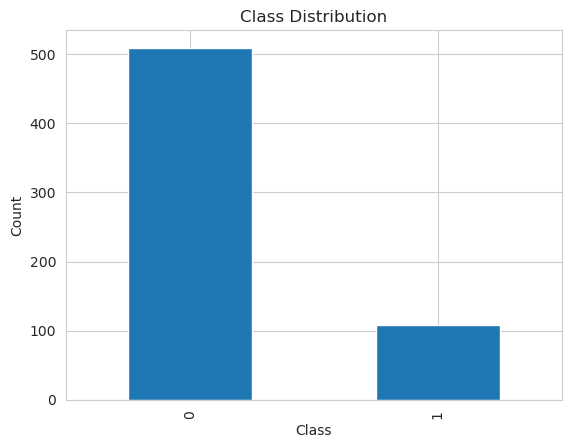

0    509
1    108
Name: Class, dtype: int64

In [22]:
# Visualize class distribution
df_train[RESPONSE].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# Show counts number
df_train[RESPONSE].value_counts()

In [23]:
df_train_class1 = df_train[df_train['Class']==1]
df_train_class0 = df_train[df_train['Class']==0]
print(df_train_class1.shape)
print(df_train_class0.shape)

(108, 57)
(509, 57)


#### Visualize Response Variable ("Class") for each Predictor (FEATURE)

(509, 57)


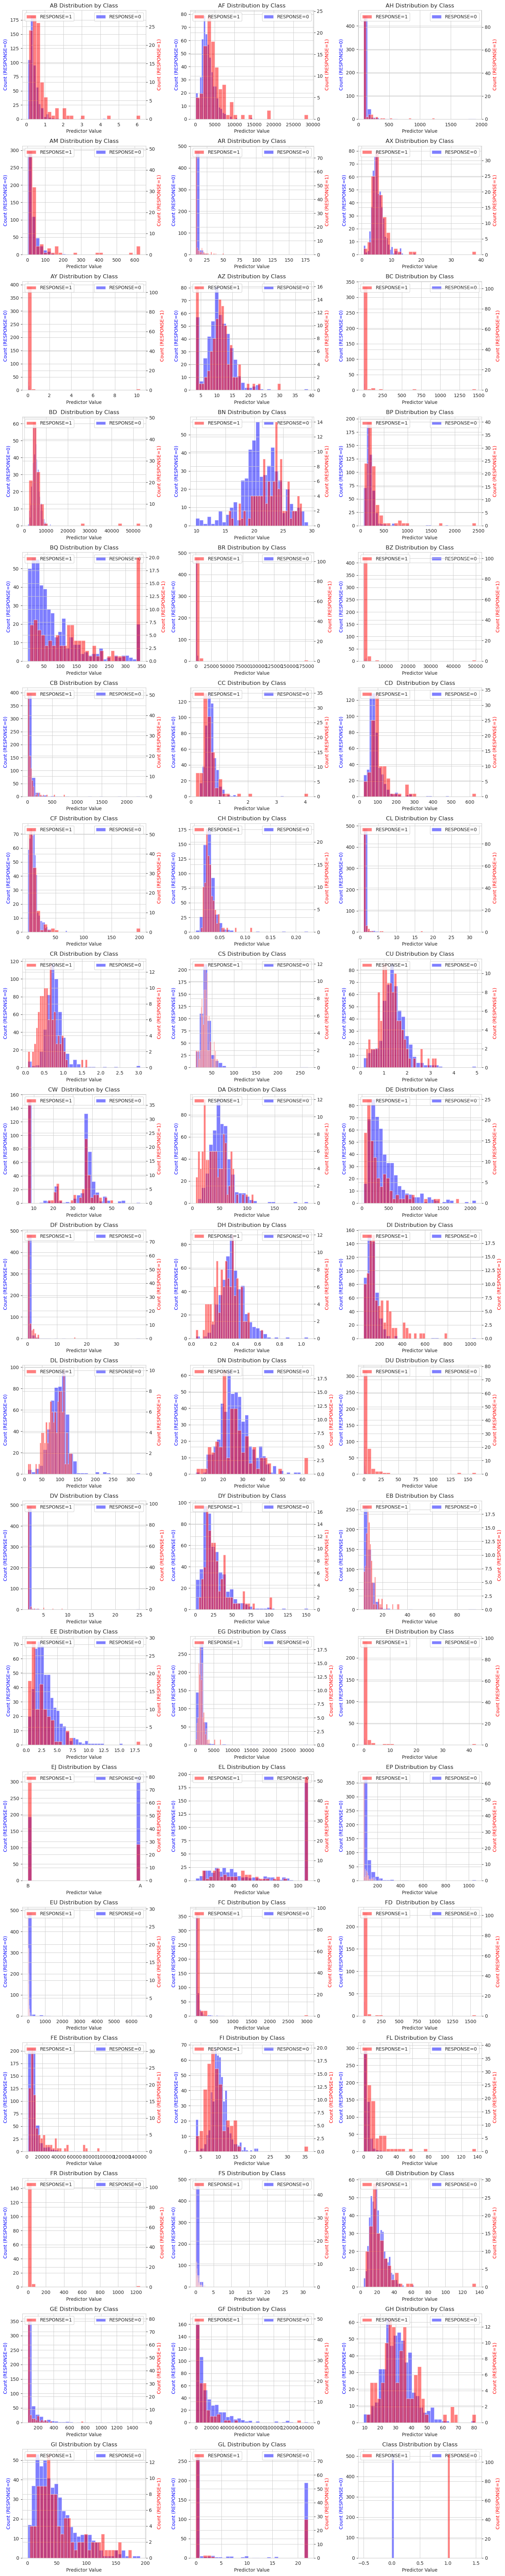

In [24]:
print(df_train_class0.shape)
#%%
# Visualize class for each features

# Adjust the size and layout of the subplots
num_plots = len(PREDICTOR)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

# Visualize the distribution for each feature on the subplots
for i, predictor_column in enumerate(PREDICTOR):
    ax = axes[i // num_cols, i % num_cols]
    ax.hist(df_train_class0[predictor_column], bins=30, alpha=0.5, label='RESPONSE=0', color='blue')
    ax2 = ax.twinx()  # Create a secondary y-axis
    ax2.hist(df_train_class1[predictor_column], bins=30, alpha=0.5, label='RESPONSE=1', color='red')

    ax.set_xlabel('Predictor Value')
    ax.set_ylabel('Count (RESPONSE=0)', color='blue')
    ax2.set_ylabel('Count (RESPONSE=1)', color='red')
    ax.set_title(f'{predictor_column} Distribution by Class')
    ax.legend(loc='upper right')
    ax2.legend(loc='upper left')
    

# Hide empty subplots if any
if num_plots % num_cols != 0:
    empty_plots = num_cols - (num_plots % num_cols)
    for i in range(empty_plots):
        fig.delaxes(axes[num_rows-1, num_cols-1-i])

plt.tight_layout()
plt.show()


### Correlation Matrix

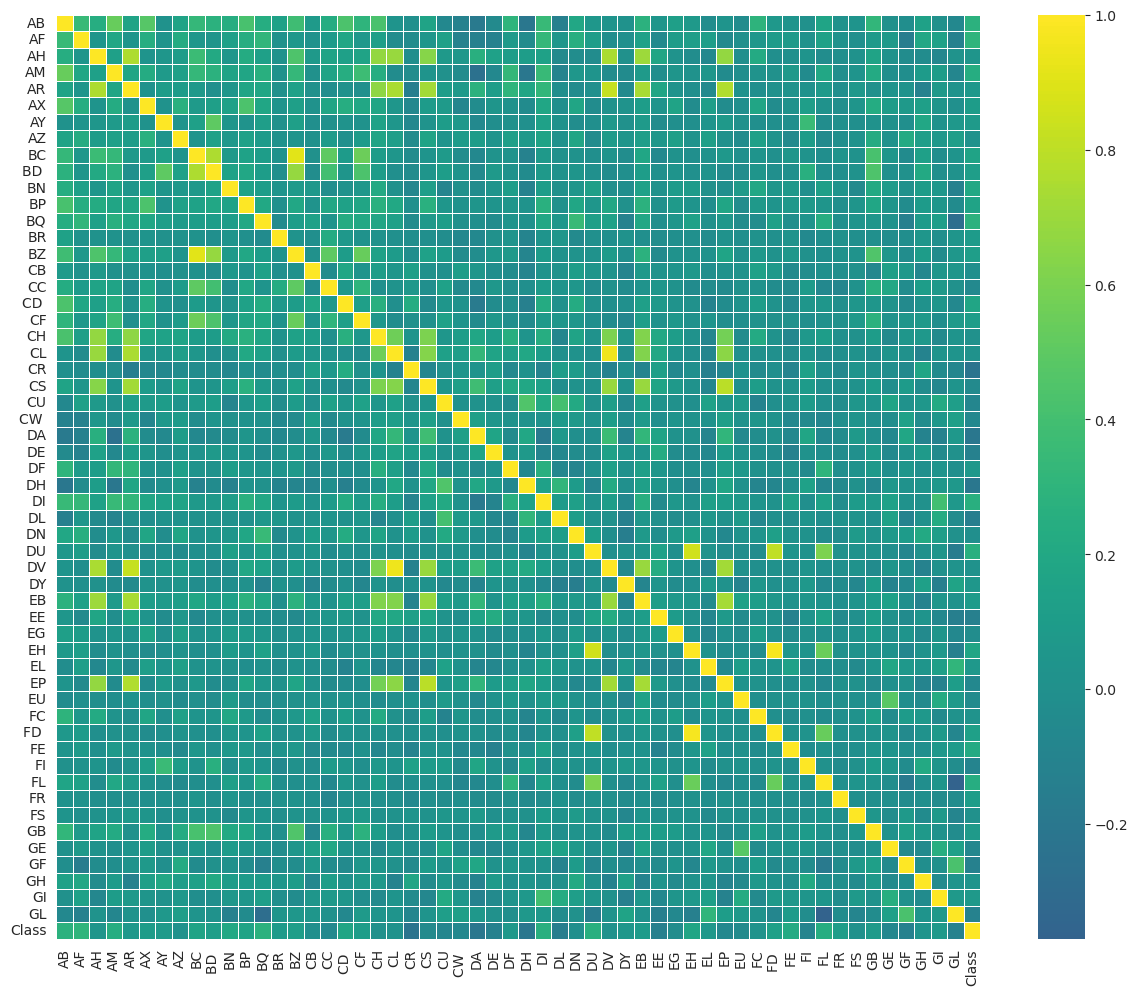

In [25]:
#sns.set(rc={"figure.figsize": (60,60)})
f,ax = plt.subplots(figsize = (15,12))
sns.heatmap(
    df_train.corr(),
    annot_kws={'fontsize':8},
    linewidths=0.5,
    square = True,
    center=0,
    cbar=True,
    cmap="viridis",
    fmt="0.2f",
)
plt.show()

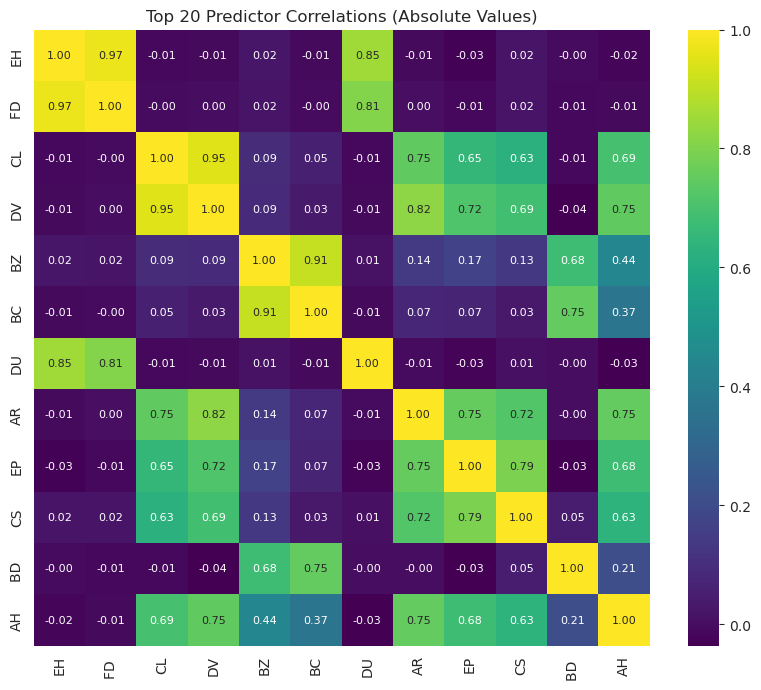

EH  FD     0.971152
CL  DV     0.948991
BZ  BC     0.907981
DU  EH     0.850957
DV  AR     0.823012
DU  FD     0.805989
EP  CS     0.794158
AR  EP     0.754615
BC  BD     0.753051
AH  AR     0.749794
dtype: float64

In [26]:
# Calculate the correlation matrix between features
correlation_matrix = df_train.corr()

# Get the absolute values of the correlation matrix
abs_correlation_matrix = correlation_matrix.abs()

# Get the top n correlations
n = 20  # specify top n number
top_correlations = abs_correlation_matrix[abs_correlation_matrix < 1.0].unstack().sort_values(ascending=False)[:n]

# Get the column names from the top correlations without changing the order
predictor_names = []
for item in top_correlations.index:
    if item[0] not in predictor_names:
        predictor_names.append(item[0])
    if item[1] not in predictor_names:
        predictor_names.append(item[1])
        
# Create a new correlation matrix with only the top n correlations
top_correlation_matrix = df_train[predictor_names].corr()

# Adjust the size of the figure
plt.figure(figsize=(10, 8))

# Visualize the top n correlations using a heatmap
sns.heatmap(top_correlation_matrix, annot=True, cmap='viridis', fmt=".2f", 
            annot_kws={'fontsize': 8}, square=True)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Set title
plt.title(f'Top {n} Predictor Correlations (Absolute Values)')

# Display the heatmap
plt.show()

# Show the specific correlation
top_correlations_unique = top_correlations.drop_duplicates()
top_correlations_unique

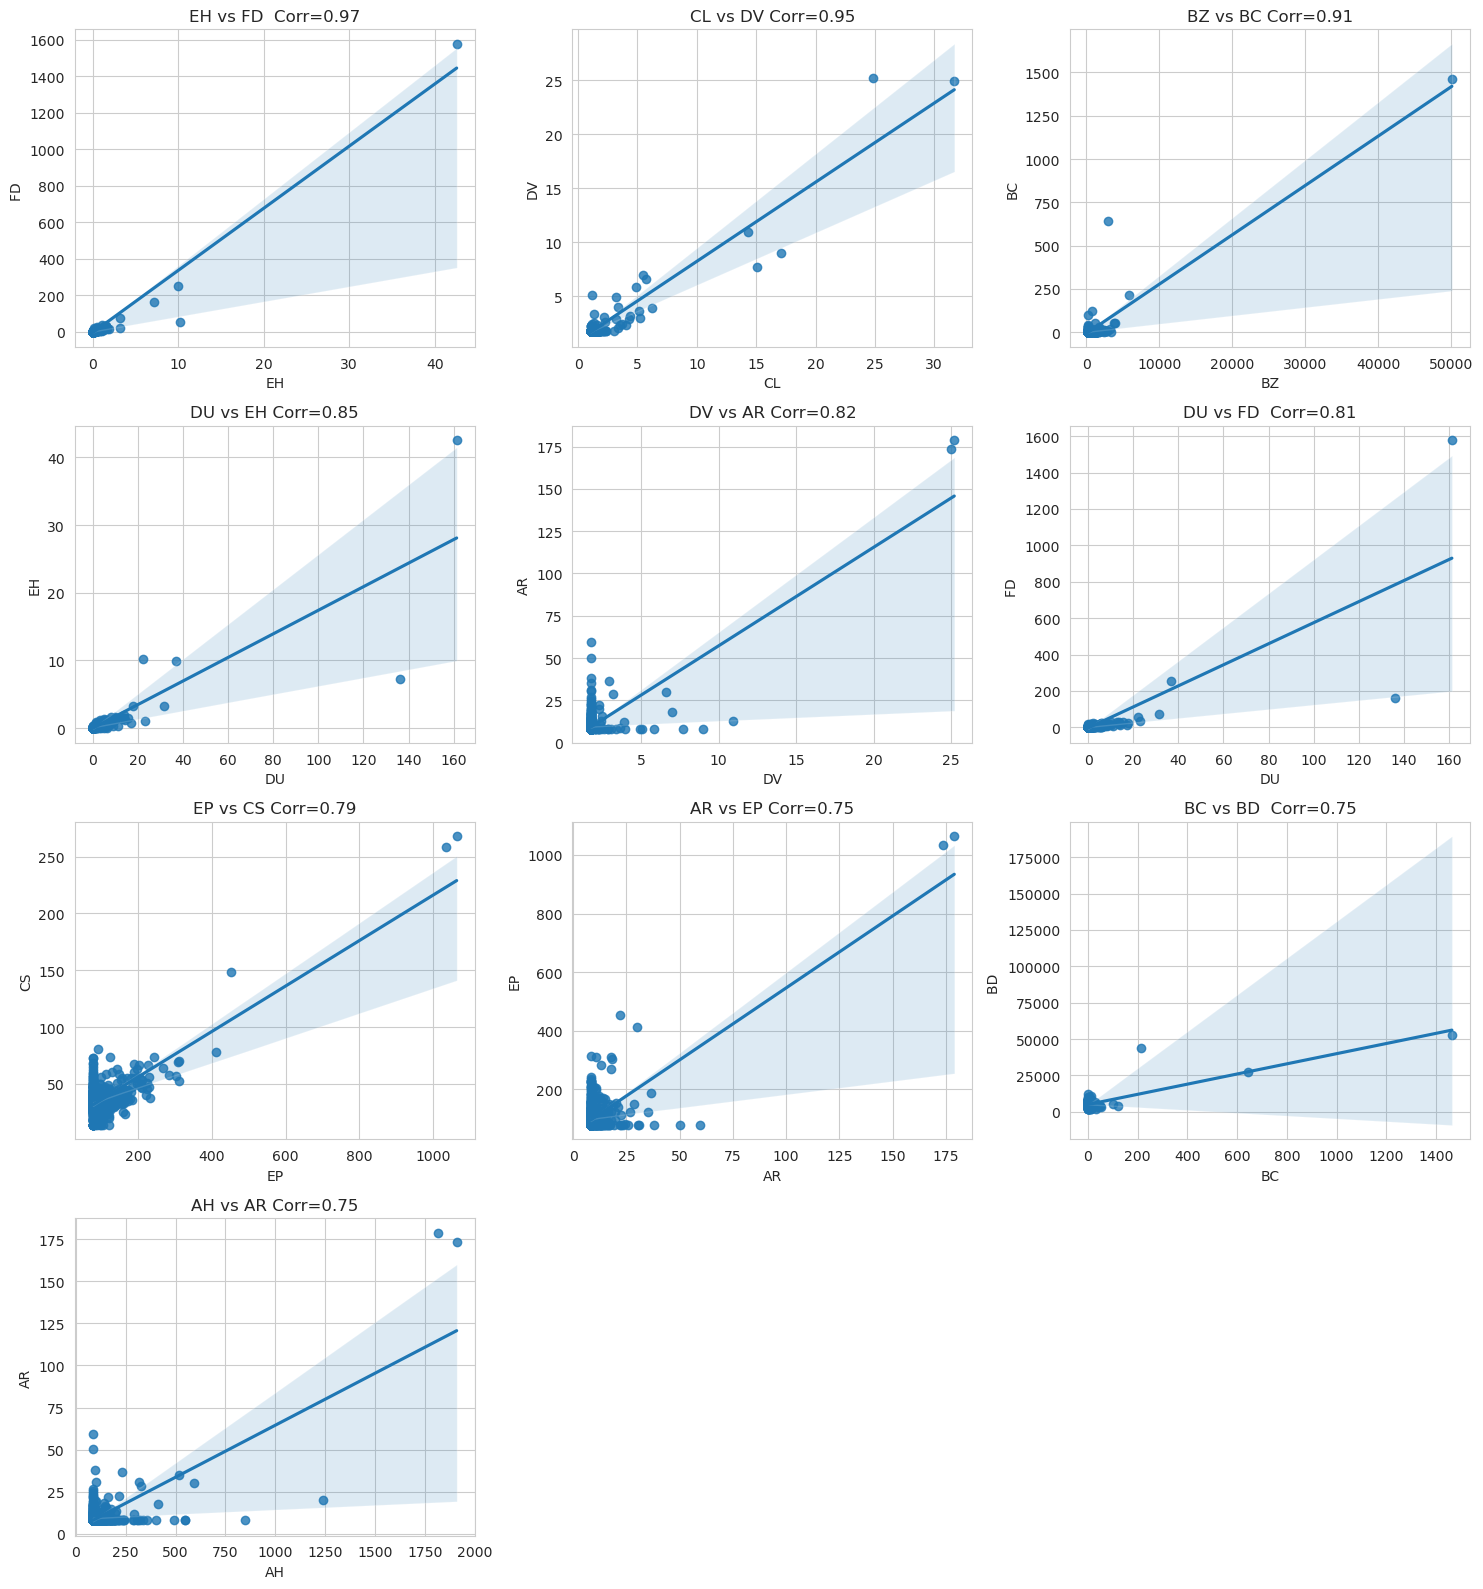

In [27]:
# Calculate the number of rows and columns for subplots
num_plots = len(top_correlations_unique.index)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

# Visualize the specific correlations using regplots
for i, (predictor1, predictor2) in enumerate(top_correlations_unique.index):
    ax = axes[i // num_cols, i % num_cols]
    sns.regplot(data=df_train, x=predictor1, y=predictor2, ax=ax)
    ax.set_xlabel(predictor1)
    ax.set_ylabel(predictor2)
    ax.set_title(f'{predictor1} vs {predictor2} Corr={top_correlations_unique[i]:.2f}')

# Hide empty subplots if any
if num_plots % num_cols != 0:
    empty_plots = num_cols - (num_plots % num_cols)
    for i in range(empty_plots):
        fig.delaxes(axes[num_rows-1, num_cols-1-i])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

#### Reduce Memory Usage

In [28]:
def reduce_memory_usage(df):

    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype.name
        if ((col_type != 'datetime64[ns]') & (col_type != 'category')):
            if (col_type != 'object'):
                c_min = df[col].min()
                c_max = df[col].max()

                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)

                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        pass
            else:
                df[col] = df[col].astype('category')
    mem_usg = df.memory_usage().sum() / 1024 ** 2
    print("Memory usage became: ",mem_usg," MB")

    return df

In [29]:
df_train = reduce_memory_usage(df_train)

Memory usage of dataframe is 0.27 MB
Memory usage became:  0.06967353820800781  MB


### Explore Relationships Between Coded Health Characteristics and Class

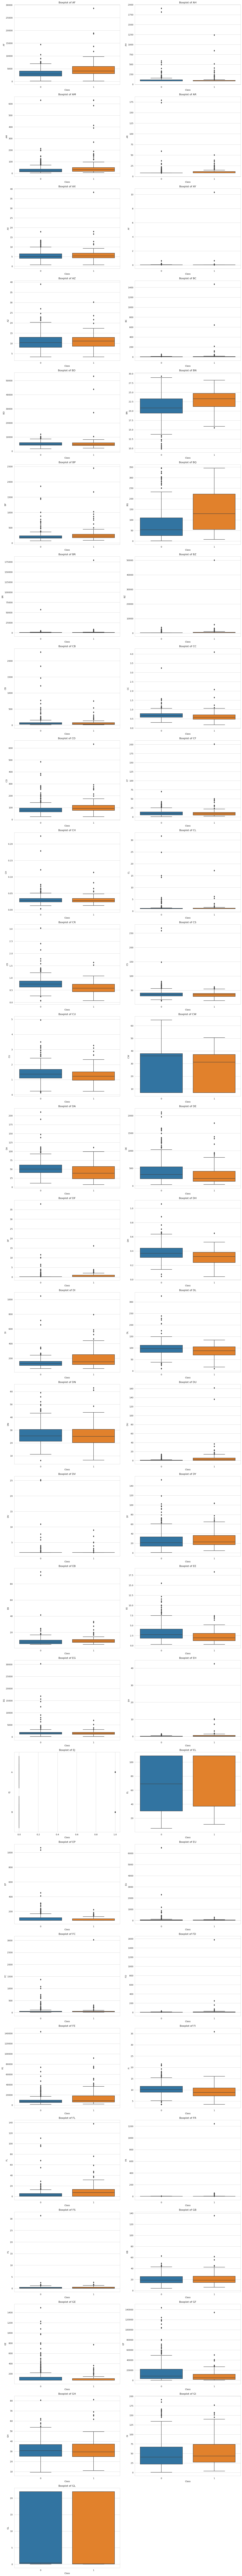

In [30]:
health_cols = df_train.columns[1:-1]  # Select the 56 anonymized health characteristics columns

num_cols = 2  # Number of boxplots per row
num_rows = (len(health_cols) + num_cols - 1) // num_cols  # Calculate the number of rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6 * num_rows))

# Create boxplots for each health characteristic
for i, col_name in enumerate(health_cols):
    row = i // num_cols
    col = i % num_cols

    sns.boxplot(x='Class', y=col_name, data=df_train, ax=axes[row, col])
    axes[row, col].set_xlabel('Class')
    axes[row, col].set_ylabel(col_name)
    axes[row, col].set_title('Boxplot of ' + col_name)

# Adjust the spacing between subplots
plt.tight_layout()

# Remove empty subplots if the number of health characteristics is not divisible by the number of columns
if len(health_cols) % num_cols != 0:
    for i in range(len(health_cols), num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

plt.show()

### Explore Outliers

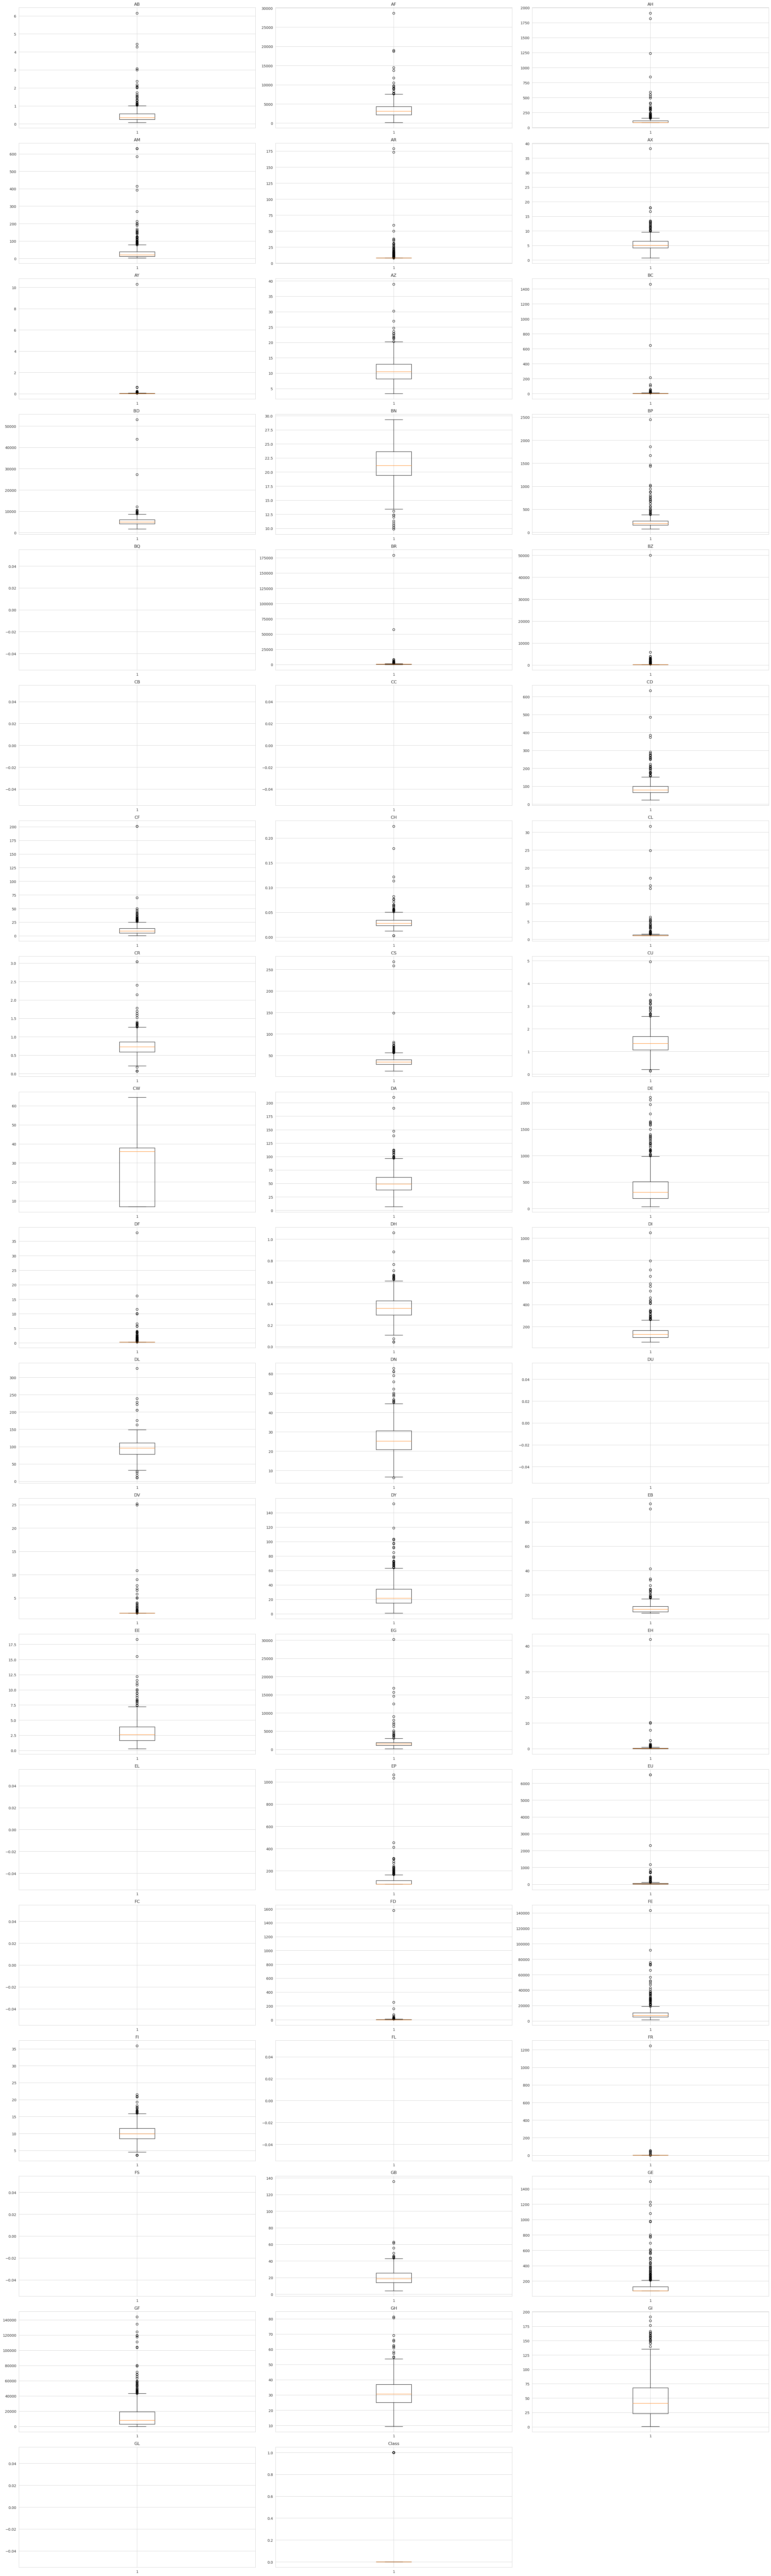

In [31]:
#Cite reference:  from Life Expectancy Case Stdy
# outlier detection aggregated in one spot
numeric_columns = df_train.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(30,100))

for i, variable in enumerate(numeric_columns):
    plt.subplot(19,3,i+1)
    plt.boxplot(df_train[variable],whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Address Missing Values and Encode Object Datatypes in Training Dataset

In [32]:
#First, encode characteristic EJ

encoder = LabelEncoder()
df_train['EJ'] = encoder.fit_transform(df_train['EJ'])


In [33]:
df_train['EJ'].unique()

array([1, 0])

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float16
 1   AF      617 non-null    float16
 2   AH      617 non-null    float16
 3   AM      617 non-null    float16
 4   AR      617 non-null    float16
 5   AX      617 non-null    float16
 6   AY      617 non-null    float16
 7   AZ      617 non-null    float16
 8   BC      617 non-null    float16
 9   BD      617 non-null    float16
 10  BN      617 non-null    float16
 11  BP      617 non-null    float16
 12  BQ      557 non-null    float16
 13  BR      617 non-null    float32
 14  BZ      617 non-null    float16
 15  CB      615 non-null    float16
 16  CC      614 non-null    float16
 17  CD      617 non-null    float16
 18  CF      617 non-null    float16
 19  CH      617 non-null    float16
 20  CL      617 non-null    float16
 21  CR      617 non-null    float16
 22  CS

In [35]:
# Mean Value Imputation for Training Data Set

df_train.fillna(df_train.mean(), inplace=True)



In [36]:
df_train.isna().sum()

AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float16
 1   AF      617 non-null    float16
 2   AH      617 non-null    float16
 3   AM      617 non-null    float16
 4   AR      617 non-null    float16
 5   AX      617 non-null    float16
 6   AY      617 non-null    float16
 7   AZ      617 non-null    float16
 8   BC      617 non-null    float16
 9   BD      617 non-null    float16
 10  BN      617 non-null    float16
 11  BP      617 non-null    float16
 12  BQ      617 non-null    float16
 13  BR      617 non-null    float32
 14  BZ      617 non-null    float16
 15  CB      617 non-null    float16
 16  CC      617 non-null    float16
 17  CD      617 non-null    float16
 18  CF      617 non-null    float16
 19  CH      617 non-null    float16
 20  CL      617 non-null    float16
 21  CR      617 non-null    float16
 22  CS

In [38]:
from sklearn.model_selection import train_test_split

X = df_train.drop(RESPONSE,axis=1)     # Drop target variables, leaving feature columns
y = df_train [RESPONSE] # Target Variable


X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=99)



# using 99 as the random seed

print('Independent variables for Class - train and test split:', X_train.shape, X_test.shape)
print ('*'*120)

print('Class predictor - train and test split:',y_train.shape, y_test.shape)




Independent variables for Class - train and test split: (431, 56) (186, 56)
************************************************************************************************************************
Class predictor - train and test split: (431,) (186,)


In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
print("{0:0.2f}% data is in training set - Features".format((len(X_train)/len(df_train.index)) * 100))
print("{0:0.2f}% data is in test set - Features".format((len(X_test)/len(df_train.index)) * 100))

69.85% data is in training set - Features
30.15% data is in test set - Features


In [41]:
print("{0:0.2f}% data is in training set - y".format((len(y_train)/len(df_train.index)) * 100))
print("{0:0.2f}% data is in test set - y".format((len(y_test)/len(df_train.index)) * 100))

69.85% data is in training set - y
30.15% data is in test set - y


### Address True-False Balancing in Predictor Variables (Zeros and Ones)

### Predictor variables are severely imbalanced with 0's, need to use under/over sampling techniques using SMOTE



In [42]:
from imblearn.over_sampling import SMOTE


#### oversampling: create oversampled training sets

In [43]:
print("Before UpSampling, counts of  POSITIVE Class event observations : {}".format(sum(y_train==1)))
print("Before UpSampling, counts of NEGATIVE Class event observations : {}".format(sum(y_train==0)))
print('*'*120)

Before UpSampling, counts of  POSITIVE Class event observations : 73
Before UpSampling, counts of NEGATIVE Class event observations : 358
************************************************************************************************************************


#### Class: Up Sampling

In [44]:

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=99)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of  POSITIVE Class event observations: {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of  NEGATIVE Class event observations: {}".format(sum(y_train_over==0)))
print('*'*120)

print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))
print('*'*120)

After UpSampling, counts of  POSITIVE Class event observations: 358
After UpSampling, counts of  NEGATIVE Class event observations: 358
************************************************************************************************************************
After UpSampling, the shape of train_X: (716, 56)
After UpSampling, the shape of train_y: (716,) 

************************************************************************************************************************


### Ensemble Modeling :  Class with Over Sampled Training Data

In [45]:
classification_models = [
    KNeighborsClassifier(),#(3),
    SVC(kernel='linear', C=0.025),#, C=0.025),
    SVC(kernel='rbf'),
    DecisionTreeClassifier(),#max_depth=5),
    RandomForestClassifier(random_state=1),#max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

scores = []
confusion_matrices = []
roc_auc_scores = []
classification_reports = []
highest_accuracy = 0
best_model = None

for model in classification_models:
    model.fit(X_train_over, y_train_over)
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    model_name = type(model).__name__
    if model_name == 'SVC' and model.kernel == 'rbf':
        model_name += ' RBF kernel'
    
    # Check if current model has higher accuracy
    if score > highest_accuracy:
        highest_accuracy = score
        best_model = model
    
    scores.append((model_name, f'{100 * score:.2f}%'))
    roc_auc = roc_auc_score(y_test, y_pred)
    roc_auc_scores.append((model_name, roc_auc))
    classification_rep = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append((model_name, classification_rep))

# Save the highest accuracy model in a variable
highest_accuracy_model = best_model

metrics_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])

# Populate the DataFrame with the metrics
for model_name, classification_rep in classification_reports:
    metrics_df = metrics_df.append({
        'Classifier': model_name,
        'Accuracy': classification_rep['accuracy'],
        'Precision': classification_rep['macro avg']['precision'],
        'Recall': classification_rep['macro avg']['recall'],
        'F1-Score': classification_rep['macro avg']['f1-score'],
        'ROC AUC': [roc_auc for clf, roc_auc in roc_auc_scores if clf == model_name][0]
    }, ignore_index=True)

# Sort the DataFrame by Accuracy
metrics_df.sort_values(by='Accuracy', ascending=False, inplace=True)
metrics_df

,Classifier,Accuracy,Precision,Recall,F1-Score,ROC AUC
4,RandomForestClassifier,0.913978,0.844917,0.914096,0.872603,0.914096
2,SVC RBF kernel,0.892473,0.832258,0.802081,0.815805,0.802081
5,AdaBoostClassifier,0.881720,0.801163,0.872280,0.827923,0.872280
7,QuadraticDiscriminantAnalysis,0.854839,0.844828,0.636235,0.671227,0.636235
1,SVC,0.844086,0.758838,0.849101,0.785842,0.849101
3,DecisionTreeClassifier,0.838710,0.739108,0.768969,0.751956,0.768969
6,GaussianNB,0.817204,0.715751,0.766698,0.734062,0.766698
0,KNeighborsClassifier,0.725806,0.637097,0.699432,0.644386,0.699432


In [46]:
highest_accuracy_model

RandomForestClassifier(random_state=1)

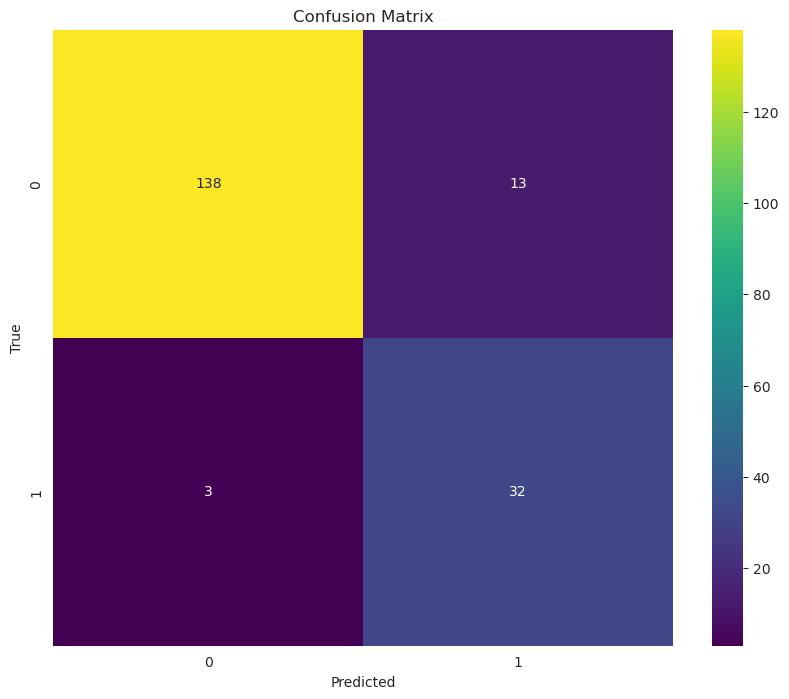

In [47]:
# Confusion Matrix
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test, highest_accuracy_model.predict(X_test))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

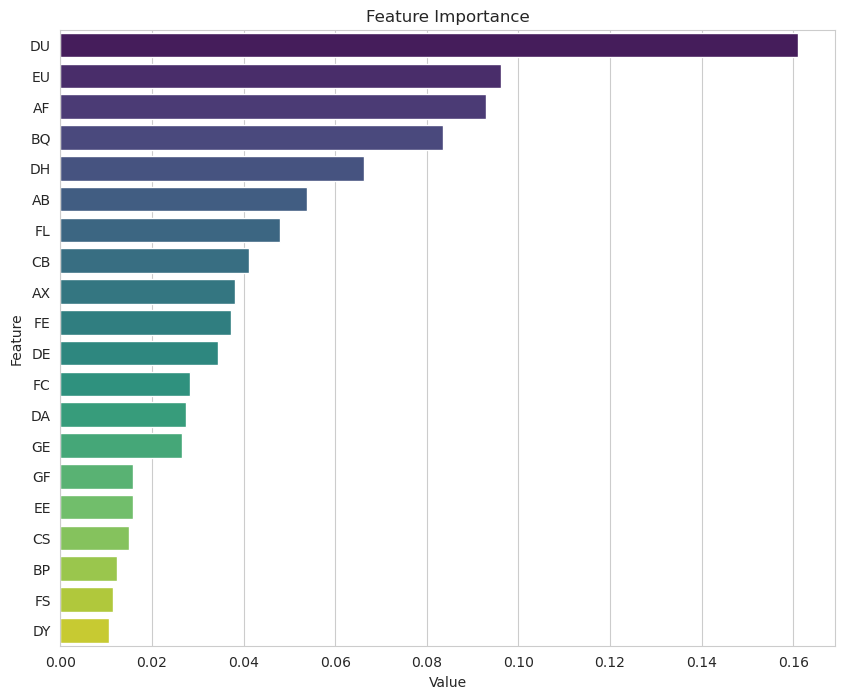

In [48]:
# Feature Importance for the last model
feature_imp = pd.DataFrame({'Value':highest_accuracy_model[-1].feature_importances_, 'Feature':X.columns})
feature_imp = feature_imp.sort_values(by="Value", ascending=False)
feature_imp_top20 = feature_imp.iloc[:20]

# Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x="Value", y="Feature", data=feature_imp_top20, palette='viridis')
plt.title('Feature Importance')
plt.show()

### Submission

In [49]:
sample_submission = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')
sample_submission.head()

,Id,class_0,class_1
0,00eed32682bb,0.5,0.5
1,010ebe33f668,0.5,0.5
2,02fa521e1838,0.5,0.5
3,040e15f562a2,0.5,0.5
4,046e85c7cc7f,0.5,0.5


#### Test Dataset Prep for Inference

In [50]:
X_test = df_test.drop(['Id'], axis=1)


In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      5 non-null      float64
 1   AF      5 non-null      float64
 2   AH      5 non-null      float64
 3   AM      5 non-null      float64
 4   AR      5 non-null      float64
 5   AX      5 non-null      float64
 6   AY      5 non-null      float64
 7   AZ      5 non-null      float64
 8   BC      5 non-null      float64
 9   BD      5 non-null      float64
 10  BN      5 non-null      float64
 11  BP      5 non-null      float64
 12  BQ      5 non-null      float64
 13  BR      5 non-null      float64
 14  BZ      5 non-null      float64
 15  CB      5 non-null      float64
 16  CC      5 non-null      float64
 17  CD      5 non-null      float64
 18  CF      5 non-null      float64
 19  CH      5 non-null      float64
 20  CL      5 non-null      float64
 21  CR      5 non-null      float64
 22  CS    

In [52]:
X_test.fillna(X_test.mean(), inplace=True)

In [53]:
X_test.isna().sum()

AB     0
AF     0
AH     0
AM     0
AR     0
AX     0
AY     0
AZ     0
BC     0
BD     0
BN     0
BP     0
BQ     0
BR     0
BZ     0
CB     0
CC     0
CD     0
CF     0
CH     0
CL     0
CR     0
CS     0
CU     0
CW     0
DA     0
DE     0
DF     0
DH     0
DI     0
DL     0
DN     0
DU     0
DV     0
DY     0
EB     0
EE     0
EG     0
EH     0
EJ     0
EL     0
EP     0
EU     0
FC     0
FD     0
FE     0
FI     0
FL     0
FR     0
FS     0
GB     0
GE     0
GF     0
GH     0
GI     0
GL     0
dtype: int64

In [54]:
X_test['EJ'].unique()

array(['A'], dtype=object)

In [55]:
X_test['EJ'] = encoder.fit_transform(X_test['EJ'])

In [56]:
X_test['EJ'].unique()

array([0])

In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      5 non-null      float64
 1   AF      5 non-null      float64
 2   AH      5 non-null      float64
 3   AM      5 non-null      float64
 4   AR      5 non-null      float64
 5   AX      5 non-null      float64
 6   AY      5 non-null      float64
 7   AZ      5 non-null      float64
 8   BC      5 non-null      float64
 9   BD      5 non-null      float64
 10  BN      5 non-null      float64
 11  BP      5 non-null      float64
 12  BQ      5 non-null      float64
 13  BR      5 non-null      float64
 14  BZ      5 non-null      float64
 15  CB      5 non-null      float64
 16  CC      5 non-null      float64
 17  CD      5 non-null      float64
 18  CF      5 non-null      float64
 19  CH      5 non-null      float64
 20  CL      5 non-null      float64
 21  CR      5 non-null      float64
 22  CS    

## Inference

In [58]:
probabilities = highest_accuracy_model.predict_proba(X_test)

In [59]:
probabilities

array([[0.61, 0.39],
       [0.61, 0.39],
       [0.61, 0.39],
       [0.61, 0.39],
       [0.61, 0.39]])

In [60]:
submission = pd.DataFrame(columns = sample_submission.columns)
submission ['Id'] = sample_submission ['Id']
submission [['class_0','class_1']] = probabilities
submission

,Id,class_0,class_1
0,00eed32682bb,0.61,0.39
1,010ebe33f668,0.61,0.39
2,02fa521e1838,0.61,0.39
3,040e15f562a2,0.61,0.39
4,046e85c7cc7f,0.61,0.39


### Submission

In [61]:
submission.to_csv('/kaggle/working/submission.csv',index=False)